# I. Data Uderstanding

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Type | Text | Brand Name of Car |
| Region | Text | The region in which the used car was offered for sale |
| Make | Text | Name of the car company |
| Gear_Type | Text | Automatic / Manual |
| Origin | Text | Country of importer (Gulf / Saudi / Other) |
| Options | Text | Full Options / Semi-Full / Standard |
| Year | Int | Year of Manufacturing |
| Engine_Size | Float | The engine size of used car |
| Mileage | Int | The average distance that a vehicle can travel on (in km) |
| Negotiable | Bool| If True, the price is 0. This means the price is negotiable (not set) |
| Price | Int | Price of the used car (in SAR) |

# II. Business Problem

**Context**


**Problem Statement**

Penentuan harga mobil bekas bagi suatu perusahaan merupakan satu tantangan utama yang dihadapi. Hal itu karena penaksiran harga mobil bekas tidaklah mudah. Penentuan harga yang berbasis kepada beberapa faktor mobil bekas seperti merk, jenis mesin, tahun dan lainnya merupakan satu hal yang membutuhkan keahlian lebih sehingga mendapatkan harga yang cocok dengan pasar. Satu perusahaan mobil bekas tidak bisa menentukan harga dengan acak, dikarenakan tidak akan bisa mendapatkan mobil bekas dengan harga jauh di bawah pasar tetapi juga tidak bisa untuk memberikan harga terlalu tinggi terhadap mobil bekas yang akan dijadikan komoditi pasar karena akan mengurangi profit margin dari perusahaan tersebut.

Oleh karena itu dibutuhkan sebuah pemodelan machine learning yang dapat memberikan prediksi dari suatu harga mobil sehingga bisa didapatkan basis harga dari mobil bekas berdasarkan data historis perusahaan. Pemodelan machine learning tersebut akan memudahkan perusahaan untuk mendapatkan harga yang cocok terhadap mobil bekas yang akan dijadikan komoditi sehingga profit margin dari perusahaan dapat terpenuhi dengan baik.

**Goal**

Dengan adanya tantangan tersebut, ingin dicapai tujuan berupa pemodelan machine learning yang dapat memprediksi harga suatu mobil bekas berdasarkan data historis penjualan mobil bekas yang dimiliki oleh perusahaan. Sehingga ketika perusahaan akan melakukan jual beli mobil bekas, perusahaan dapat memberikan perkiraan harga berdasarkan tren pasar dan sesuai dengan spesifikasi mobil tanpa dengan cepat dan mudah, dan dapat menjaga profit margin dengan baik.

**Analytic Approach**

Perlu dilakukan analisis terhadap data yang dimiliki, sehingga dapat menentukan feature yang akan digunakan di dalam pemodelan machine learning yang menggunakan feature yang relevan untuk memprediksi harga dari mobil bekas tersebut.

Model ini berguna sebagai alat yang dapat dijadikan panduan dalam penentuan harga mobil bekas sehingga perusahaan tidak mendapatkan harga yang overprice dari pasar.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan R². RMSE (Root Mean Squared Error) adalah nilai rata-rata akar kuadrat dari error, yang digunakan untuk mengukur seberapa jauh prediksi model dibandingkan nilai aktual dalam satuan yang sama dengan variabel target. MAE (Mean Absolute Error) adalah rata-rata dari nilai absolut error, yang menunjukkan seberapa besar error prediksi tanpa memperhatikan arah kesalahannya. Semakin kecil nilai RMSE dan MAE yang dihasilkan, semakin baik akurasi model dalam memprediksi sesuai dengan data observasi.

Selain itu, R² (R-squared) akan digunakan untuk mengevaluasi seberapa baik model dapat menjelaskan variabilitas data. Nilai R² berkisar antara 0 hingga 1, di mana nilai mendekati 1 menunjukkan bahwa model memiliki kemampuan yang baik dalam merepresentasikan data observasi. Jika nilai R² rendah, hal ini mengindikasikan bahwa model kurang mampu menjelaskan varians data, sehingga kemungkinan diperlukan perbaikan pada fitur atau model yang digunakan.

# III. Import Library

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import FunctionTransformer
import joblib


from feature_engine.outliers import Winsorizer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from phik import phik_matrix
from scipy.stats import randint, uniform

import warnings
import joblib

warnings.filterwarnings('ignore')




# IV. Data Loading

In [89]:
# Load data dari CSV
data_car = pd.read_csv("data_saudi_used_cars.csv")

In [90]:
# Melihat sekilas data dengan 5 data teratas
data_car.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [91]:
# Detail jenis data di dalam setiap kolom
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


# V. Data Preprocessing

Dataset yang digunakan perlu melalui tahap preprocessing untuk memastikan data yang digunakan dalam analisis sudah bersih dan siap diolah lebih lanjut. Data yang bersih akan membantu meningkatkan akurasi analisis, mempercepat proses kerja, dan mempermudah pengambilan keputusan. Beberapa langkah penting yang dilakukan dalam preprocessing antara lain:

- Menghapus fitur-fitur yang tidak relevan dengan permasalahan yang sedang dianalisis.
- Menangani missing value dengan cara yang sesuai, seperti menghapus entri yang bermasalah atau menggunakan metode imputasi.
- Menghapus data yang terdeteksi sebagai duplikasi untuk memastikan kualitas data.
- Menyesuaikan tipe data agar sesuai dengan kebutuhan analisis, misalnya mengonversi tipe data numerik atau kategori.

Dengan langkah-langkah tersebut, dataset yang dihasilkan akan lebih optimal untuk digunakan dalam proses analisis maupun pemodelan.

## Data Cleaning    

In [92]:
data = data_car.copy()

### Checking Missing Value

In [93]:
# Memeriksa missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
missing_data_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_df.head(20)

,Total,Percent
Type,0,0.0
Region,0,0.0
Make,0,0.0
Gear_Type,0,0.0
Origin,0,0.0
Options,0,0.0
Year,0,0.0
Engine_Size,0,0.0
Mileage,0,0.0
Negotiable,0,0.0


Tidak terdapat missing value pada data, sehingga tidak diperlukan penangan apapun terhadap data

### Checking Duplication

In [94]:
# Mengecek jumlah data duplikat
print("Jumlah data duplikat:", data.duplicated().sum())

Jumlah data duplikat: 4


In [95]:
# Menampilkan data yang duplikat
print("Data duplikat:")
print(data[data.duplicated()])

Data duplikat:
        Type  Region     Make  Gear_Type Origin   Options  Year  Engine_Size  \
953      Rio  Riyadh      Kia  Automatic  Saudi  Standard  2016          1.4   
4646  Sonata  Jeddah  Hyundai  Automatic  Saudi  Standard  2020          2.4   
4933  Tucson  Dammam  Hyundai  Automatic  Saudi  Standard  2016          2.0   
5267   Camry  Riyadh   Toyota  Automatic  Saudi      Full  2013          2.5   

      Mileage  Negotiable  Price  
953    270000       False  25000  
4646      100       False  72910  
4933   155000       False  45000  
5267   185000        True      0  


Terdapat indikasi bahwa ada 4 baris data yang terduplikasi

In [96]:
# Mendrop data yang duplikat
data = data.drop_duplicates()

In [97]:
# Memastikan data duplikat telah terhapus
print("Jumlah data duplikat setelah menghapus duplikat:", data.duplicated().sum())

Jumlah data duplikat setelah menghapus duplikat: 0


## Memeriksa nilai unik pada setiap kolom

In [98]:
# Menentukan kolom kategorikal berdasarkan tipe data
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Menampilkan nilai unik untuk setiap kolom kategorikal
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Kolom '{column}': {len(unique_values)} nilai unik")
    print(unique_values)

Kolom 'Type': 347 nilai unik
['Corolla' 'Yukon' 'Range Rover' 'Optima' 'FJ' 'CX3' 'Cayenne S' 'Sonata'
 'Avalon' 'LS' 'C300' 'Land Cruiser' 'Hilux' 'Tucson' 'Caprice' 'Sunny'
 'Pajero' 'Azera' 'Focus' '5' 'Spark' 'Camry' 'Pathfinder' 'Accent' 'ML'
 'Tahoe' 'Yaris' 'Suburban' 'A' 'Altima' 'Traverse' 'Expedition'
 'Senta fe' 'Liberty' '3' 'X' 'Elantra' 'Land Cruiser Pickup' 'VTC'
 'Malibu' 'The 5' 'A8' 'Patrol' 'Grand Cherokee' 'SL' 'Previa' 'SEL'
 'Aveo' 'MKZ' 'Victoria' 'Datsun' 'Flex' 'GLC' 'ES' 'Edge' '6' 'Escalade'
 'Innova' 'Navara' 'H1' 'G80' 'Carnival' 'Symbol' 'Camaro' 'Accord'
 'Avanza' 'Land Cruiser 70' 'Taurus' 'C5700' 'Impala' 'Optra' 'S' 'Other'
 'Cerato' 'Furniture' 'Murano' 'Explorer' 'LX' 'Pick up' 'Charger' 'H6'
 'BT-50' 'Hiace' 'Ranger' 'Fusion' 'Rav4' 'Ciocca' 'CX9' 'Kona' 'Sentra'
 'Sierra' 'Durango' 'CT-S' 'Sylvian Bus' 'Navigator' 'Opirus' 'Marquis'
 'The 7' 'FX' 'Creta' 'D-MAX' 'CS35' 'The 3' 'Dyna' 'GLE' 'Sedona'
 'Prestige' 'CLA' 'Lumina' 'Vanquish' 'Sorento' 'S

In [99]:
# Menampilkan semua konten kolom tanpa terpotong
pd.set_option('display.max_colwidth', None) 

# Menentukan kolom kategorikal
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Membuat DataFrame untuk menyimpan hasil
unique_values_summary = {
    'Column': [],
    'Unique Count': [],
    'Unique Values': []
}

# Iterasi setiap kolom kategorikal dan simpan informasinya
for col in categorical_columns:
    unique_values_summary['Column'].append(col)
    unique_values_summary['Unique Count'].append(len(data[col].unique()))
    unique_values_summary['Unique Values'].append(data[col].unique())

# Konversi dictionary menjadi DataFrame
unique_values_data = pd.DataFrame(unique_values_summary)

# Tampilkan hasil
unique_values_data

,Column,Unique Count,Unique Values
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Negotiable,2,"[True, False]"


berdasarkan hasil pemeriksaan terdapat nilai 'Unknown' pada kolom origin, nilai tersebut akan dirubah menjadi null dan dianggap sebagi missing data

In [100]:
# merubah nilai unknown menjadi null
data.replace(to_replace='Unknown', value=np.nan)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [101]:
# menghilangkan baris data yang memiliki nilai null
data = data.dropna(axis=0)
data

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [102]:
# Memeriksa kembali apakah masih terdapat missing data
data.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

Data sudah bersih dari missing value yang ada, pada kolom diatas terlihat tidak terdapat lagi missing value pada data.

## Data Correlation

Korelasi pada data akan dilihat dengan module phik, modul ini digunakan karena dapat melihat secara langsung korelasi antara data numerical dan kategorikal yang efektif digunakan pada data yang tidak terlalu besar sehingga memudahkan pengerjaan.

Documentantion: https://phik.readthedocs.io/en/latest/

In [103]:
correlation_matrix = phik_matrix(data)

interval columns not set, guessing: ['Year', 'Engine_Size', 'Mileage', 'Price']


In [104]:
correlation_matrix

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
Type,1.000000,0.000000,0.999957,0.888490,0.465320,0.670104,0.819814,0.931150,0.653745,0.225069,0.779089
Region,0.000000,1.000000,0.317287,0.181414,0.182002,0.191363,0.252101,0.174688,0.108756,0.261937,0.000000
Make,0.999957,0.317287,1.000000,0.555626,0.367977,0.488892,0.368021,0.689912,0.000000,0.150742,0.628031
Gear_Type,0.888490,0.181414,0.555626,1.000000,0.035153,0.046515,0.259646,0.329464,0.033102,0.183471,0.145271
Origin,0.465320,0.182002,0.367977,0.035153,1.000000,0.136269,0.171327,0.135952,0.024122,0.158828,0.164681
Options,0.670104,0.191363,0.488892,0.046515,0.136269,1.000000,0.208469,0.377615,0.000000,0.040775,0.293814
Year,0.819814,0.252101,0.368021,0.259646,0.171327,0.208469,1.000000,0.285575,0.252847,0.205772,0.203676
Engine_Size,0.931150,0.174688,0.689912,0.329464,0.135952,0.377615,0.285575,1.000000,0.154877,0.188474,0.301097
Mileage,0.653745,0.108756,0.000000,0.033102,0.024122,0.000000,0.252847,0.154877,1.000000,0.022216,0.000000
Negotiable,0.225069,0.261937,0.150742,0.183471,0.158828,0.040775,0.205772,0.188474,0.022216,1.000000,0.426078


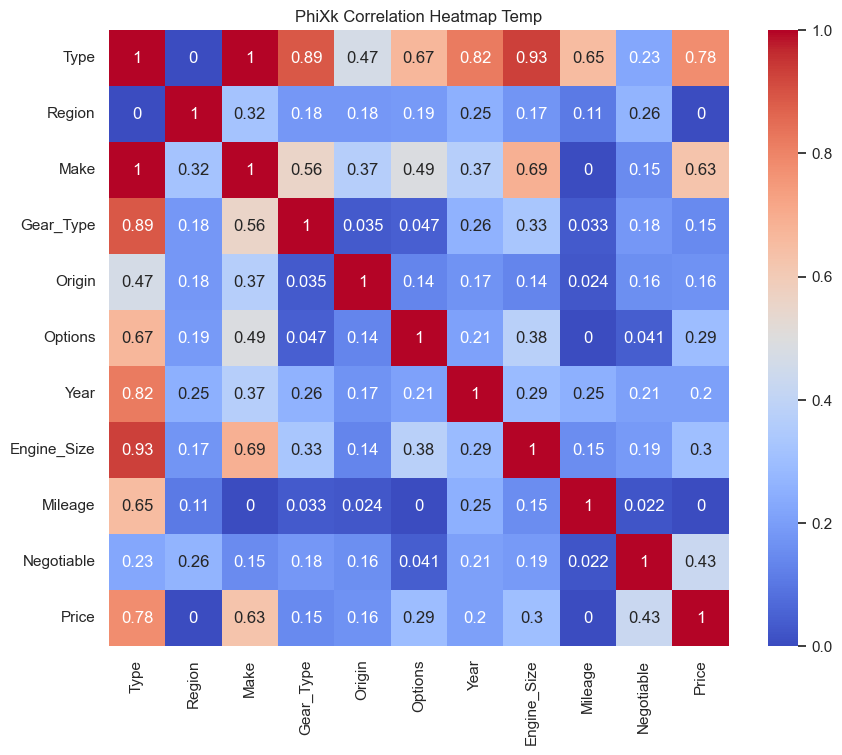

In [105]:
# Create heatmap from correlation_matrix temp
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('PhiXk Correlation Heatmap Temp')
plt.show()

Berdasarkan matriks korelasi di atas dapat disimpulkan bahwa variabel yang memiliki nilai korelasi cukup tinggi pada variabel 'Price' (yang merupakan data target) adalah varibael 'Type', 'Make', 'Negotiable', 'Options', dan 'Engine_Size'. Sedangkan variabel yang masih memiliki korelasi terhadap 'Price' walaupun kecil adalah variabel 'Gear_Type' dan 'Origin'. Sedangkan variabel 'Region' dan 'Mileage' tidak memiliki korelasi sama sekali. 

Hal ini dapat membantu dalam feature selection, dimana dapat diperkirakan bahwa varibael 'Type', 'Make', 'Negotiable', 'Options', dan 'Engine_Size' merupakan variabel yang relevan untuk digunakan sebagai feature pada machine learning sedangkan variabel 'Region' dan 'Mileage' dapat langsung di drop karena tidak berpengaruh terhadap 'Price' sama sekali.

In [106]:
# Drop kolom yang tidak digunakan sebagai feature
data = data.drop(['Region','Mileage'],axis=1)

In [107]:
data

,Type,Make,Gear_Type,Origin,Options,Year,Engine_Size,Negotiable,Price
0,Corolla,Toyota,Manual,Saudi,Standard,2013,1.4,True,0
1,Yukon,GMC,Automatic,Saudi,Full,2014,8.0,False,120000
2,Range Rover,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,False,260000
3,Optima,Kia,Automatic,Saudi,Semi Full,2015,2.4,False,42000
4,FJ,Toyota,Automatic,Saudi,Full,2020,4.0,True,0
...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Nissan,Automatic,Saudi,Standard,2018,2.5,False,68000
5620,Altima,Nissan,Automatic,Saudi,Semi Full,2020,2.5,True,0
5621,Yukon,GMC,Automatic,Saudi,Full,2016,5.3,False,145000
5622,RX,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,False,154000


Berdasarkan hasil analisis diatas, sudah didapatkan data yang bersih serta penentuan feature awal, dimana feature yang tidak memiliki korelasi kepada data target (Price) sudah di drop untuk memudahkan pengerjaan dalam pembuatan model.

# VI. Feature Engineering

## Splitting Data Target (Y) dan Feature (X)

In [108]:
dfml= data

In [109]:
# Menentukan data feature (X) dan data target (y)
X = dfml.drop(['Price'],axis=1)
y = pd.DataFrame(dfml['Price'])

In [110]:
# Split between Train-Set,and Test-Set
# Splitting dilakukan dengan membagi data menjadi Train-Set (70) : Test-Set (30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (3934, 8)
Test Size :  (1686, 8)


## Scaling and Encoding

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3934 entries, 270 to 860
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3934 non-null   object 
 1   Make         3934 non-null   object 
 2   Gear_Type    3934 non-null   object 
 3   Origin       3934 non-null   object 
 4   Options      3934 non-null   object 
 5   Year         3934 non-null   int64  
 6   Engine_Size  3934 non-null   float64
 7   Negotiable   3934 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 249.7+ KB


In [112]:
# Mengidentifikasi fitur numerik dan kategori
categorical_features = ['Type', 'Make', 'Gear_Type', 'Origin', 'Options', 'Negotiable']
numeric_features = ['Year', 'Engine_Size']

## Data Distribution

### Data Distribution Numerical Value

In [113]:
def diagnostic_plots(numeric_features, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_features[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numeric_features[variable])
    plt.title('Boxplot')

    plt.show()

def find_normal_boundaries(numeric_features, var):
    upper_boundary = numeric_features[var].mean() + 3 * numeric_features[var].std()
    lower_boundary = numeric_features[var].mean() - 3 * numeric_features[var].std()

    return upper_boundary, lower_boundary

def percentage_outlier(numeric_features, var, upper_boundary, lower_boundary):
    outlier_right_tail = (len(numeric_features[numeric_features[var] > upper_boundary]) / len(numeric_features) * 100)
    outlier_left_tail = (len(numeric_features[numeric_features[var] < lower_boundary]) / len(numeric_features) * 100)
    return outlier_right_tail, outlier_left_tail



Variable: Year


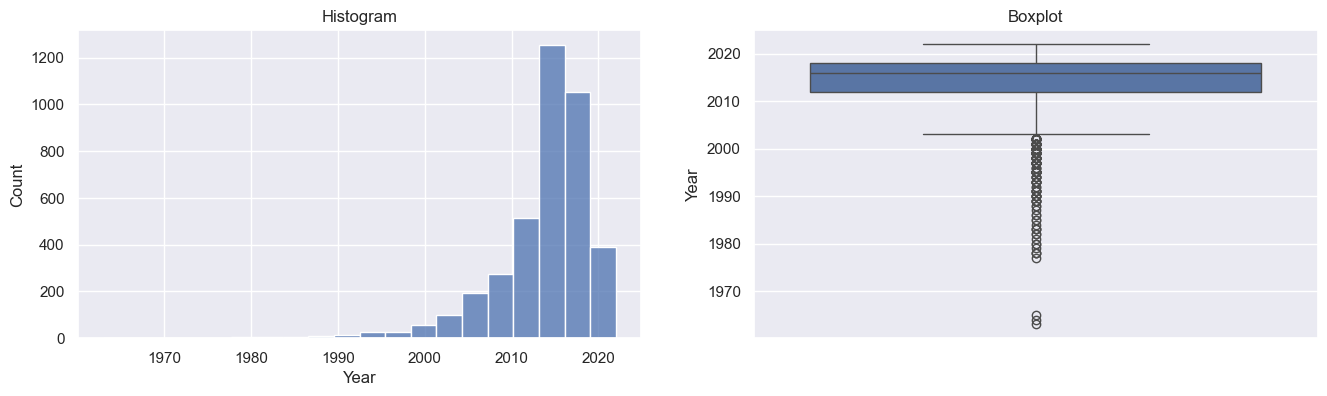

Skewness Value: -2.3761066420602615
Upper Boundary: 2031.7439251053888
Lower Boundary: 1996.3608029068123
% right end outliers: 0.0
% left end outliers: 1.8556176919166243
Skewed Distribution
--------------------

Variable: Engine_Size


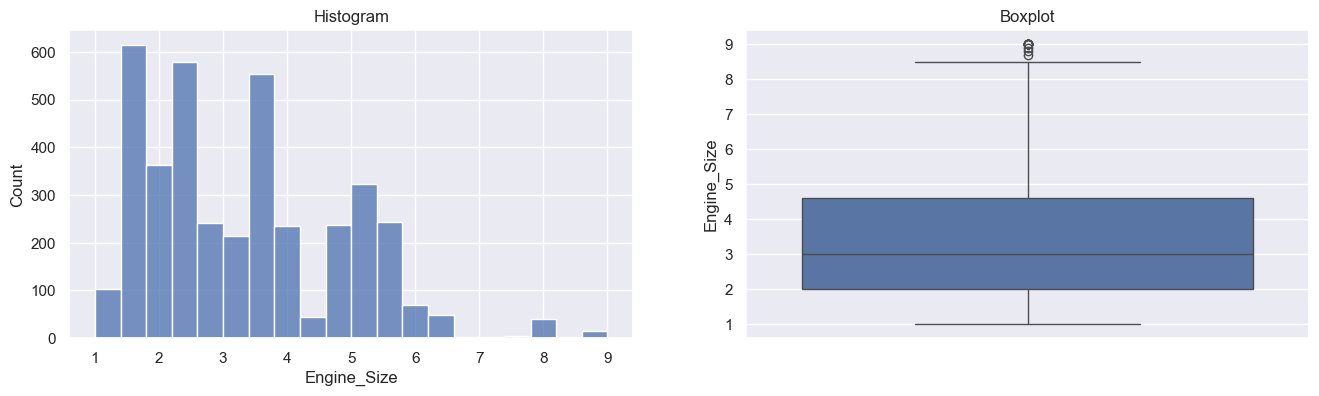

Skewness Value: 0.7315832191201468
Upper Boundary: 7.92303713458643
Lower Boundary: -1.2958383547186103
% right end outliers: 1.4489069649211999
% left end outliers: 0.0
Skewed Distribution
--------------------


In [114]:
variables = numeric_features
X_train_numeric = X_train[numeric_features]

for variable in variables:
    print(f"\nVariable: {variable}")
    diagnostic_plots(X_train_numeric, variable)
    print('Skewness Value:', X_train_numeric[variable].skew())
    
    upper_boundary, lower_boundary = find_normal_boundaries(X_train_numeric, variable)
    print('Upper Boundary:', upper_boundary)
    print('Lower Boundary:', lower_boundary)

    outlier_right_tail, outlier_left_tail = percentage_outlier(X_train_numeric, variable, upper_boundary, lower_boundary)
    print(f"% right end outliers: {outlier_right_tail}")
    print(f"% left end outliers: {outlier_left_tail}")

    if (X_train_numeric[variable].skew() <= -0.5) | (X_train_numeric[variable].skew() >= 0.5):
        print('Skewed Distribution')
        print('-'*20)
    else:
        print('Normal Distribution')
        print('-'*20)


## Outliers Handling For Numerical Value

In [115]:
def outlier_analysis(numeric_features, col):
  skewness = numeric_features[col].skew()
  if skewness >= -0.5 and skewness <= 0.5:
    upper = numeric_features[col].mean() + 3 * numeric_features[col].std()
    lower = numeric_features[col].mean() - 3 * numeric_features[col].std()
  else:
    Q1 = numeric_features[col].quantile(0.25)
    Q3 = numeric_features[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = numeric_features[(numeric_features[col] >= lower) & (numeric_features[col] <= upper)]
  outliers = numeric_features[(numeric_features[col] > upper) | (numeric_features[col] < lower)]
  
  return outliers, no_outliers

In [116]:
columns = numeric_features
for col in columns:
    outliers, no_outliers = outlier_analysis(X_train_numeric, col)
    
    if len(outliers) > 0:
        print(f'Column name: {col}')
        print('Count of outliers:', len(outliers))
        print('Percentage of outliers:', (len(outliers) / len(X_train_numeric)) * 100, '%')
    else:
        print(f'Column name: {col}')
        print('No outliers found')
    
    print('-' * 20)


Column name: Year
Count of outliers: 184
Percentage of outliers: 4.677173360447382 %
--------------------
Column name: Engine_Size
Count of outliers: 14
Percentage of outliers: 0.3558718861209964 %
--------------------


In [117]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
wins.fit(X_train_numeric)
X_train_numeric = wins.transform(X_train_numeric)

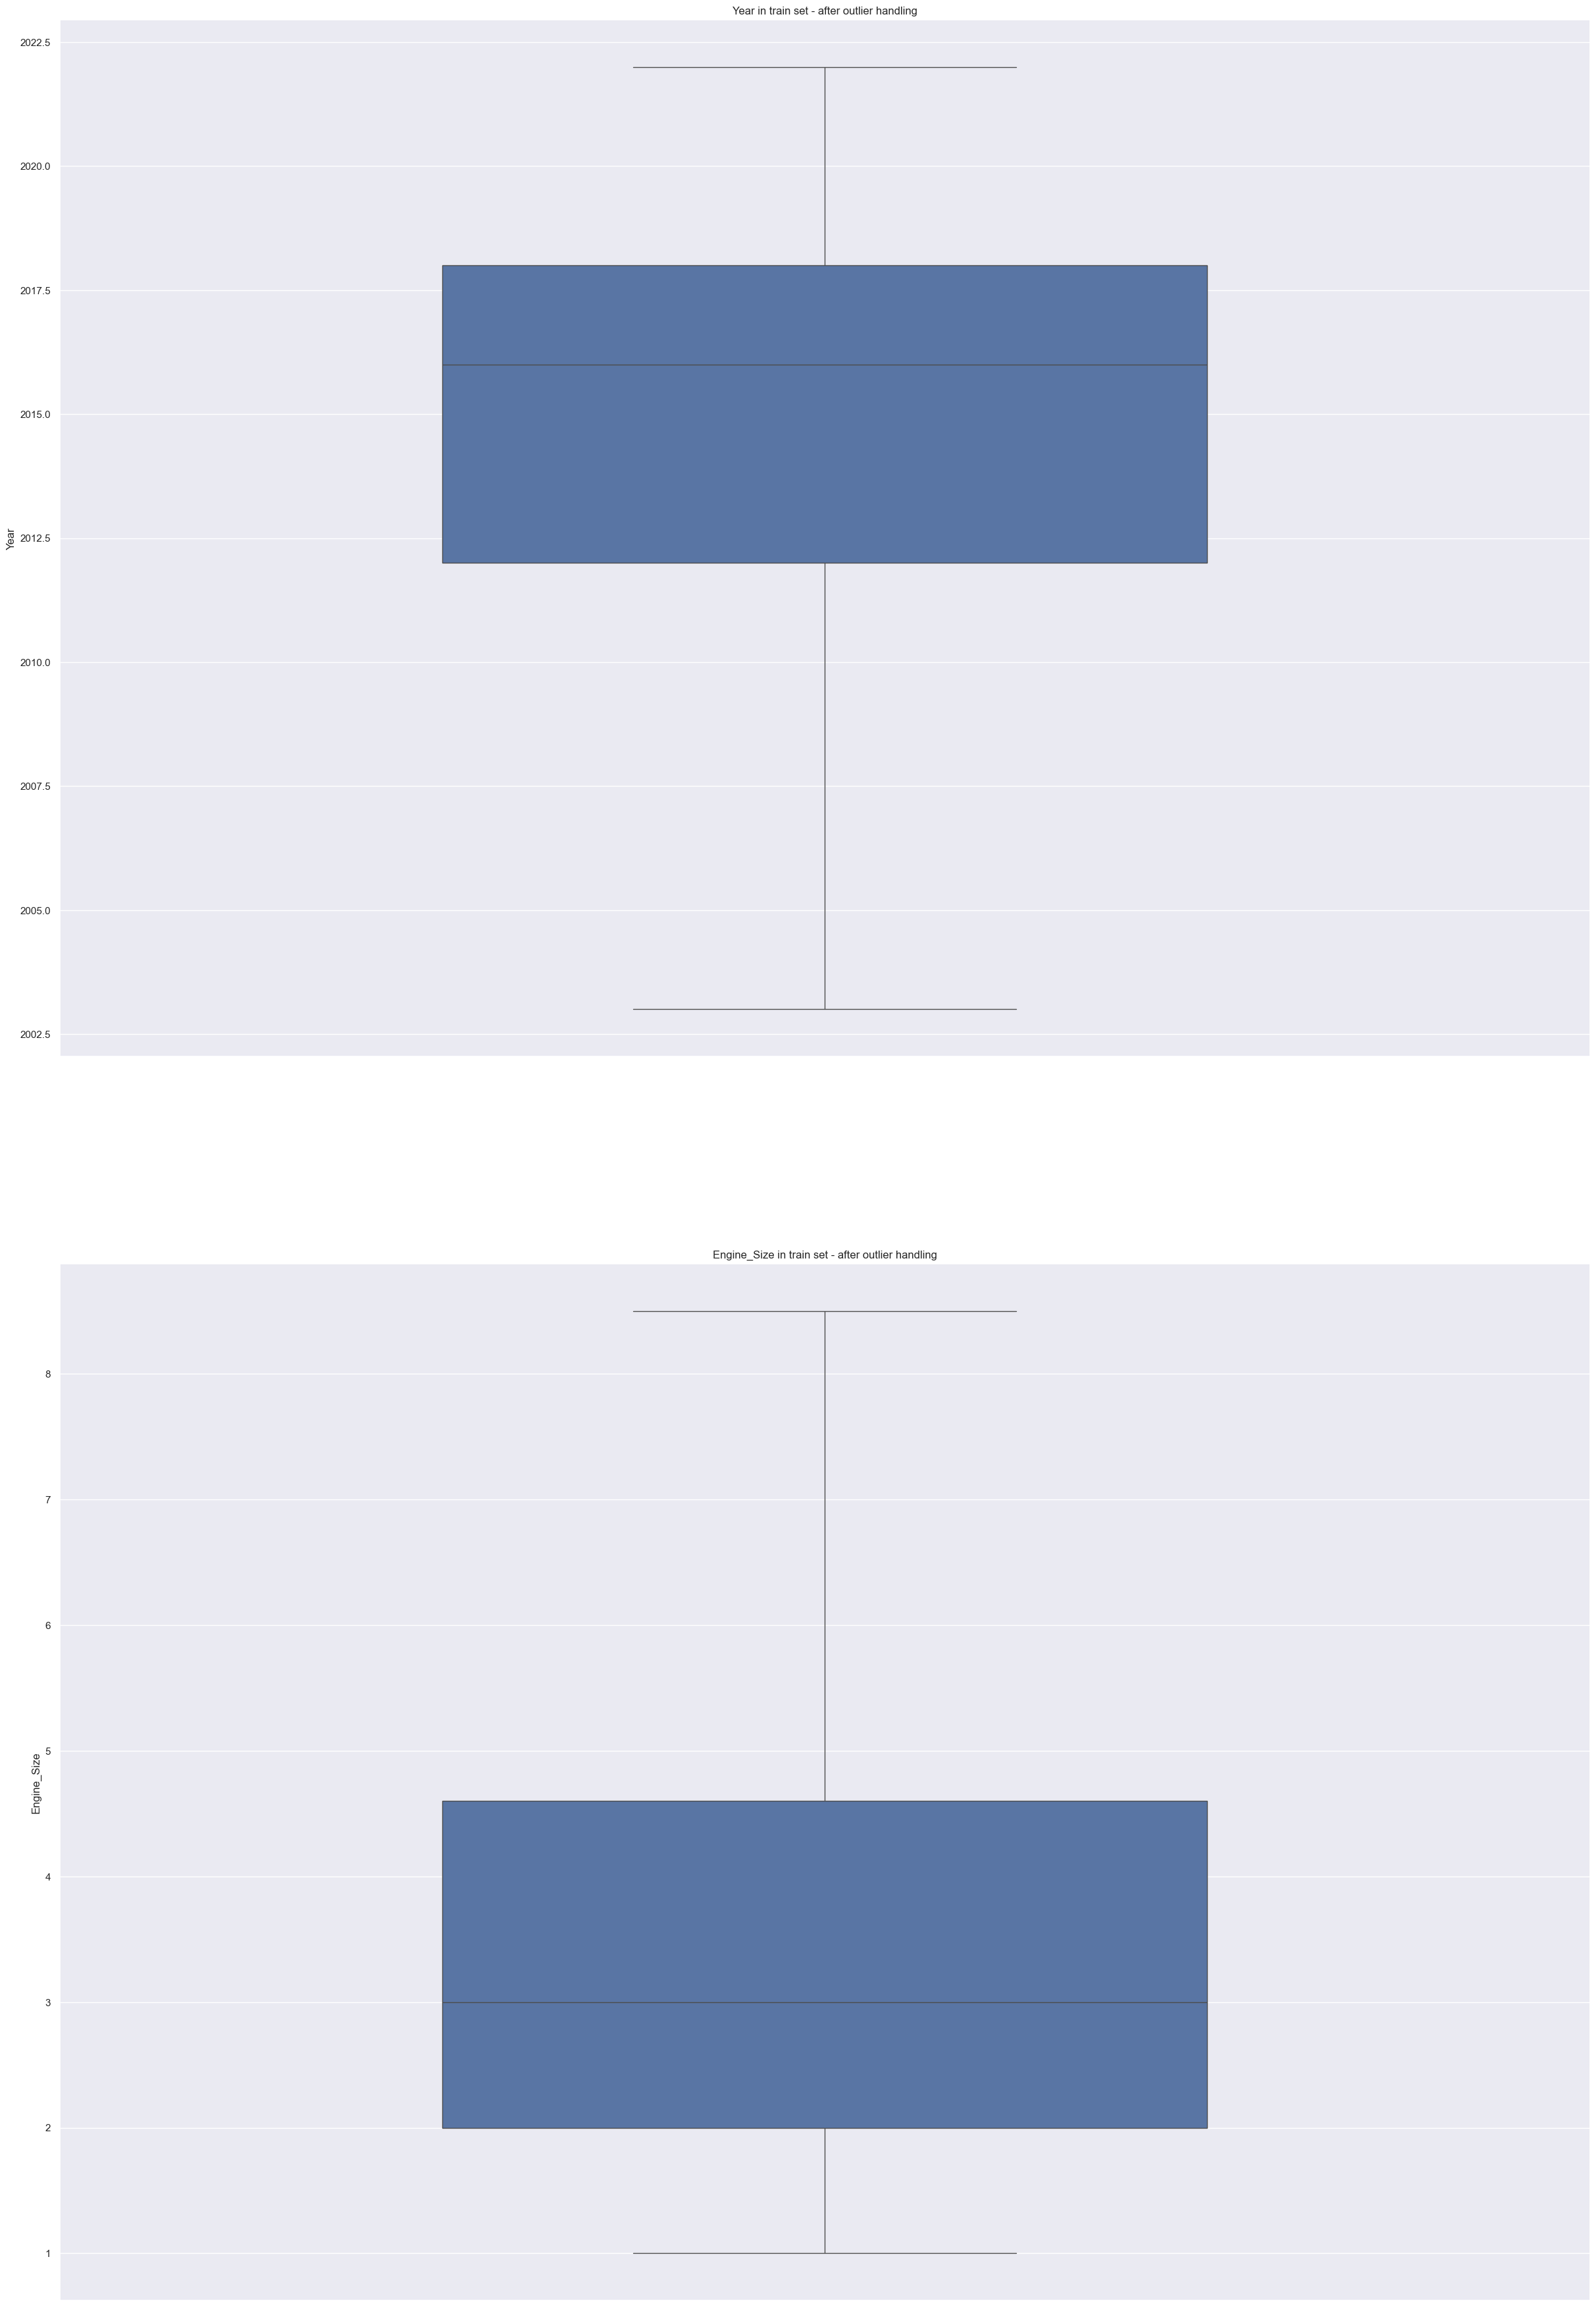

In [118]:
num = X_train_numeric
n = len(num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n, 1, figsize=(30, 45))
for i, col in enumerate(num.columns):
    sns.boxplot(ax=ax[i], data=X_train_numeric[col], width=0.50)
    ax[i].set_title(f'{col} in train set - after outlier handling')

plt.show()


In [119]:
# Gabungkan kembali kolom numerik yang telah ditransformasi dengan kolom lainnya
X_train[numeric_features] = X_train_numeric

## Encoding For Categorical Data

In [120]:
X_train

,Type,Make,Gear_Type,Origin,Options,Year,Engine_Size,Negotiable
270,Silverado,Chevrolet,Automatic,Saudi,Standard,2018,5.3,False
3561,Range Rover,Land Rover,Automatic,Saudi,Full,2020,5.0,False
4587,Camry,Toyota,Automatic,Other,Full,2019,3.6,True
5102,Durango,Dodge,Automatic,Saudi,Standard,2016,3.6,True
2446,Hiace,Toyota,Manual,Gulf Arabic,Standard,2016,2.7,False
...,...,...,...,...,...,...,...,...
3773,Yukon,GMC,Automatic,Saudi,Full,2010,6.2,True
5194,C300,Chrysler,Automatic,Other,Full,2005,5.7,False
5229,Fusion,Ford,Automatic,Saudi,Semi Full,2015,2.5,False
5394,Countryman,MINI,Automatic,Other,Full,2016,2.0,False


In [121]:
categorical_features_onehot = ['Gear_Type', 'Origin', 'Options']
categorical_features_binary = ['Type', 'Make', 'Negotiable']

In [122]:
# Memastikan kolom boolean dikonversi menjadi numerik sebelum transformasi
X_train['Negotiable'] = X_train['Negotiable'].astype(int)
X_test['Negotiable'] = X_test['Negotiable'].astype(int)

In [123]:
# Membuat transformer untuk fitur kategori
onehot_transformer = OneHotEncoder(handle_unknown='ignore')
binary_transformer = BinaryEncoder()

In [124]:
# Menggabungkan transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, categorical_features_onehot),
        ('binary', binary_transformer, categorical_features_binary)
    ],
    remainder='passthrough'  # Kolom lain tidak diubah
)

In [125]:
# Terapkan ColumnTransformer ke dataset train dan test
# Fit preprocessor pada data train
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Mendapatkan nama kolom dari OneHotEncoder
onehot_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features_onehot).tolist()

# Mendapatkan nama kolom dari BinaryEncoder
binary_encoded_example = pd.DataFrame(
    preprocessor.named_transformers_['binary'].fit_transform(X_train[categorical_features_binary])
)
binary_columns = binary_encoded_example.columns.tolist()

# Mendapatkan nama kolom dari 'passthrough'
passthrough_columns = [col for col in X_train.columns if col not in categorical_features_onehot + categorical_features_binary]

# Gabungkan semua nama kolom
all_columns = onehot_columns + binary_columns + passthrough_columns

# Konversi hasil transformasi ke DataFrame
X_train_encoded = pd.DataFrame(X_train_transformed, columns=all_columns)
X_test_encoded = pd.DataFrame(X_test_transformed, columns=all_columns)

# Periksa hasil akhir
print(X_train_encoded.head())
print(X_test_encoded.head())

   Gear_Type_Automatic  Gear_Type_Manual  Origin_Gulf Arabic  Origin_Other  \
0                  1.0               0.0                 0.0           0.0   
1                  1.0               0.0                 0.0           0.0   
2                  1.0               0.0                 0.0           1.0   
3                  1.0               0.0                 0.0           0.0   
4                  0.0               1.0                 1.0           0.0   

   Origin_Saudi  Origin_Unknown  Options_Full  Options_Semi Full  \
0           1.0             0.0           0.0                0.0   
1           1.0             0.0           1.0                0.0   
2           0.0             0.0           1.0                0.0   
3           1.0             0.0           0.0                0.0   
4           0.0             0.0           0.0                0.0   

   Options_Standard  Type_0  ...  Type_8  Make_0  Make_1  Make_2  Make_3  \
0               1.0     0.0  ...     1.0     0

## Scaling For Numerical Data

In [126]:
# Membuat transformer untuk fitur numerik
numeric_transformer = StandardScaler()

In [127]:
# Apply Standard Scaling pada fitur numerik di train set
X_train_scaled = pd.DataFrame(
    numeric_transformer.fit_transform(X_train[numeric_features]),
    columns=numeric_features,
    index=X_train.index
)

In [128]:
# Menggunakan parameter yang di-fit dari train set untuk transformasi test set
X_test_scaled = pd.DataFrame(
    numeric_transformer.transform(X_test[numeric_features]),
    columns=numeric_features,
    index=X_test.index
)

In [129]:
# Gabungkan kembali data yang telah di-encode dengan data numerik yang telah di-scale
# Pastikan untuk menghapus kolom numerik asli dari encoded data sebelum penggabungan
X_train_encoded = X_train_encoded.drop(columns=numeric_features, errors='ignore')
X_test_encoded = X_test_encoded.drop(columns=numeric_features, errors='ignore')

X_train = pd.concat([X_train_scaled.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_scaled.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

In [130]:
# Melihat hasil transformasi
print(X_train.head())
print(X_test.head())

       Year  Engine_Size  Gear_Type_Automatic  Gear_Type_Manual  \
0  0.771363     1.298916                  1.0               0.0   
1  1.200244     1.102905                  1.0               0.0   
2  0.985803     0.188188                  1.0               0.0   
3  0.342483     0.188188                  1.0               0.0   
4  0.342483    -0.399844                  0.0               1.0   

   Origin_Gulf Arabic  Origin_Other  Origin_Saudi  Origin_Unknown  \
0                 0.0           0.0           1.0             0.0   
1                 0.0           0.0           1.0             0.0   
2                 0.0           1.0           0.0             0.0   
3                 0.0           0.0           1.0             0.0   
4                 1.0           0.0           0.0             0.0   

   Options_Full  Options_Semi Full  ...  Type_6  Type_7  Type_8  Make_0  \
0           0.0                0.0  ...     0.0     0.0     1.0     0.0   
1           1.0                0

# VII. Feature Selection 

#### ANNOVA F-Value

In [131]:
X_train_features = X_train.copy()

# Feature Selection (select 10 best features)
selector = SelectKBest(score_func=f_classif, k=5)
selector = selector.fit(X_train_features, y_train)

df_scores = pd.DataFrame({'Feature': X_train_features.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Feature,Score,p-value
26,Negotiable,7537.850544,0.0000
0,Year,4.179113,0.0000
8,Options_Full,1.909762,0.0000
10,Options_Standard,1.892917,0.0000
1,Engine_Size,1.862243,0.0000
4,Origin_Gulf Arabic,1.651924,0.0000
6,Origin_Saudi,1.522759,0.0000
21,Make_1,1.502190,0.0000
25,Make_5,1.403622,0.0000
11,Type_0,1.375818,0.0000


In [132]:

# Inisialisasi Selector
selector = SelectKBest(score_func=f_regression, k='all')

# Fit dan Transform Data
X_train_selected = selector.fit_transform(X_train, y_train)

# Melihat Skor Feature
feature_scores = selector.scores_

# Pemilihan Fitur Terbaik
selected_features = X_train.columns[selector.get_support()]

# Menampilkan hasil
print("Feature Scores:")
for feature, score in zip(X_train.columns, feature_scores):
    print(f"{feature}: {score}")

print("\nSelected Features:")
print(selected_features)


Feature Scores:
Year: 497.3056571888461
Engine_Size: 85.19607941299667
Gear_Type_Automatic: 78.17379995485848
Gear_Type_Manual: 78.1737999548583
Origin_Gulf Arabic: 87.75740342720356
Origin_Other: 0.5740131650619001
Origin_Saudi: 46.40432940235048
Origin_Unknown: 12.525434906730784
Options_Full: 192.03911214423903
Options_Semi Full: 33.48065324397869
Options_Standard: 78.28134986845552
Type_0: 4.2856578714642595
Type_1: 0.2240778613222136
Type_2: 0.09753739006227705
Type_3: 0.17215428025896493
Type_4: 0.5222849371221314
Type_5: 0.9373815707514479
Type_6: 13.170858476005296
Type_7: 2.8334057905159122
Type_8: 4.15445906996508
Make_0: 5.71590480901274
Make_1: 49.789130390628564
Make_2: 3.095675936812747
Make_3: 13.449241141844324
Make_4: 24.569618339059076
Make_5: 33.265620165678094
Negotiable: 1416.0894774163526

Selected Features:
Index(['Year', 'Engine_Size', 'Gear_Type_Automatic', 'Gear_Type_Manual',
       'Origin_Gulf Arabic', 'Origin_Other', 'Origin_Saudi', 'Origin_Unknown',
      

In [133]:
# Convert the Index to a list
feature_list = selected_features.tolist()

print(feature_list)

['Year', 'Engine_Size', 'Gear_Type_Automatic', 'Gear_Type_Manual', 'Origin_Gulf Arabic', 'Origin_Other', 'Origin_Saudi', 'Origin_Unknown', 'Options_Full', 'Options_Semi Full', 'Options_Standard', 'Type_0', 'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6', 'Type_7', 'Type_8', 'Make_0', 'Make_1', 'Make_2', 'Make_3', 'Make_4', 'Make_5', 'Negotiable']


In [134]:
selected_features = feature_list

# Filter data train dan test menggunakan fitur yang telah dipilih
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Keputusan akhir diputuskan untuk menggunakan semua feature yang ada. Menggunakan semua fitur yang ada dapat memberikan gambaran yang lebih komprehensif tentang data dan meningkatkan akurasi model prediksi. Setiap fitur berkontribusi pada pemahaman pola yang mungkin tidak langsung terlihat. Meskipun beberapa fitur memiliki skor yang lebih rendah, mereka tetap memberikan informasi tambahan yang relevan. Selain itu, fitur dengan skor tinggi seperti Negotiable, Year, dan Options_Full menunjukkan signifikansi yang kuat, sehingga mempertahankan semua fitur membantu memastikan tidak ada informasi penting yang terabaikan. Hal ini juga memungkinkan model menangkap interaksi antar fitur yang mungkin tidak terdeteksi jika beberapa fitur dihapus.

# VIII. Machine Learning Modeling

Pemodelan regresi dilakukan dengan menggunakan 5 model linear regresi dan 3 model boosting. Model yang akan dites adalah Linear Regression, SVR, KNR, Decision Tree Regressor, Random Forest Regressor, Gradient Bossting Regressor, XGB Regressor dan LightGBM Regressor. Semua model tersebut akan dites dan dilihat metric evaluasinya, yang selanjutnya akan dipilih model dengan performa terbaik yang akan digunakan ke dalam hyper parameter tuning.

## Model Definition


In [135]:
# Define Linear regression
linreg = LinearRegression()
svr = SVR()
knr = KNeighborsRegressor()
dectree = DecisionTreeRegressor()
randomforest = RandomForestRegressor()

# Define XGB Regressor
xgb = XGBRegressor()
# Define LGBM Regressor
lgbm = LGBMRegressor()

## Model Training


In [136]:
# Dictionary to hold models
models = {
    "Linear Regression": linreg,
    "Support Vector Regressor": svr,
    "K-Neighbors Regressor": knr,
    "Decision Tree Regressor": dectree,
    "Random Forest Regressor": randomforest}
     

### Cross Validation Normal Model

In [137]:
# Function to train and evaluate models using cross-validation
def cross_val_evaluate(models, X, y, cv=5):
    results = {}
    for name, model in models.items():
        # Cross-validation
        scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Negate to get positive MSE
        rmse_scores = np.sqrt(mse_scores)
        
        scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
        mae_scores = -scores  # Negate to get positive MAE
        
        scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
        r2_scores = scores
        
        results[name] = {
            'MSE': {
                'mean': mse_scores.mean(),
                'std': mse_scores.std()
            },
            'RMSE': {
                'mean': rmse_scores.mean(),
                'std': rmse_scores.std()
            },
            'MAE': {
                'mean': mae_scores.mean(),
                'std': mae_scores.std()
            },
            'R²': {
                'mean': r2_scores.mean(),
                'std': r2_scores.std()
            }
        }
        
        # Print results
        print(f'{name} Cross-Validation MSE Mean: {results[name]["MSE"]["mean"]}')
        print(f'{name} Cross-Validation RMSE Mean: {results[name]["RMSE"]["mean"]}')
        print(f'{name} Cross-Validation MAE Mean: {results[name]["MAE"]["mean"]}')
        print(f'{name} Cross-Validation R² Mean: {results[name]["R²"]["mean"]}')
        
    return results

# Perform cross-validation
results = cross_val_evaluate(models, X_train_selected, y_train, cv=5)


Linear Regression Cross-Validation MSE Mean: 2787581957.1736593
Linear Regression Cross-Validation RMSE Mean: 52473.14911419673
Linear Regression Cross-Validation MAE Mean: 32160.93911354104
Linear Regression Cross-Validation R² Mean: 0.462372664120177
Support Vector Regressor Cross-Validation MSE Mean: 5440077303.707622
Support Vector Regressor Cross-Validation RMSE Mean: 73480.79951257867
Support Vector Regressor Cross-Validation MAE Mean: 45168.01933543056
Support Vector Regressor Cross-Validation R² Mean: -0.05775261318772214
K-Neighbors Regressor Cross-Validation MSE Mean: 1762044609.9467797
K-Neighbors Regressor Cross-Validation RMSE Mean: 41561.610752631306
K-Neighbors Regressor Cross-Validation MAE Mean: 22701.039318570536
K-Neighbors Regressor Cross-Validation R² Mean: 0.6614944510286491
Decision Tree Regressor Cross-Validation MSE Mean: 2140827504.5433793
Decision Tree Regressor Cross-Validation RMSE Mean: 45983.33035875212
Decision Tree Regressor Cross-Validation MAE Mean: 1

In [138]:
# Pilih model terbaik berdasarkan hasil cross-validation dengan nilai RMSE terendah
best_model_name = min(results, key=lambda x: np.mean(results[x]['RMSE']['mean']))  
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest Regressor


In [139]:
# Evaluasi model terbaik pada test set
best_model.fit(X_train_selected, y_train)
y_test_pred = best_model.predict(X_test_selected)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Evaluation:")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R²: {r2_test}")


Test Set Evaluation:
Test MSE: 1126259045.563056
Test RMSE: 33559.783157271086
Test MAE: 13783.266468418622
Test R²: 0.7438365036213623


Didapatkan kesimpulan berdasarkan metric evaluasi bahwa pada tahap ini model Random Forest merupakan model yang memiliki kinerja paling baik, Model ini selanjutnya akan dibandingkan dengan model boosting.

## Model Boosting

In [140]:
# Memastikan semua data dalam format NumPy array
if isinstance(X_train, pd.DataFrame):
    # Mengonversi DataFrame ke NumPy array jika diperlukan
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values


In [141]:
# Fungsi untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluasi performa model menggunakan metrik RMSE, MAE, dan R².
    
    Parameters:
        y_true (array-like): Nilai target sebenarnya.
        y_pred (array-like): Nilai prediksi model.
        model_name (str): Nama model yang dievaluasi.
    
    Returns:
        dict: Nilai RMSE, MAE, dan R².
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)  # Koefisien Determinasi (R²)
    
    # Menampilkan hasil evaluasi
    print(f'{model_name} RMSE: {rmse}')
    print(f'{model_name} MAE: {mae}')
    print(f'{model_name} R²: {r2}')
    
    return {"model_name": model_name, "rmse": rmse, "mae": mae, "r2": r2}

### Gradient Boosting Regressor

In [142]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
y_test_pred_gbr = gbr.predict(X_test)
results_gbr = evaluate_model(y_test, y_test_pred_gbr, "Gradient Boosting")

Gradient Boosting RMSE: 35786.303578974985
Gradient Boosting MAE: 19021.755163614594
Gradient Boosting R²: 0.7087186801371013


### XGB Regressor

In [143]:
# XGBoost Regressor
xgbr = XGBRegressor(random_state=0)
xgbr.fit(X_train, y_train)
y_test_pred_xgbr = xgbr.predict(X_test)
results_xgbr = evaluate_model(y_test, y_test_pred_xgbr, "XGBoost")

XGBoost RMSE: 30000.984013175163
XGBoost MAE: 14004.4580270619
XGBoost R²: 0.7952848672866821


### LGBM Regressor

In [144]:
# LightGBM Regressor
lgbmr = LGBMRegressor(random_state=0)
lgbmr.fit(X_train, y_train)
y_test_pred_lgbmr = lgbmr.predict(X_test)
results_lgbmr = evaluate_model(y_test, y_test_pred_lgbmr, "LightGBM")

LightGBM RMSE: 29338.97645734547
LightGBM MAE: 13771.327792045482
LightGBM R²: 0.8042197550547889


In [145]:
# Membandingkan hasil evaluasi model
all_results = [results_gbr, results_xgbr, results_lgbmr]
best_model = min(all_results, key=lambda x: x["rmse"])  # Memilih model dengan RMSE terendah

# Menampilkan model terbaik
print("\nModel terbaik berdasarkan RMSE:")
print(f"Model: {best_model['model_name']}")
print(f"RMSE: {best_model['rmse']}")
print(f"MAE: {best_model['mae']}")
print(f"R²: {best_model['r2']}")


Model terbaik berdasarkan RMSE:
Model: LightGBM
RMSE: 29338.97645734547
MAE: 13771.327792045482
R²: 0.8042197550547889


#### Best Model on Boosted Model

In [146]:
# Definisikan LightGBM sebagai best_model_boosting
best_model_boosting = lgbmr

In [147]:
# Evaluate the best model on the train set
y_train_pred_boosting = best_model_boosting.predict(X_train)
rmse_train_boosting = np.sqrt(mean_squared_error(y_train, y_train_pred_boosting))
mae_train_boosting = mean_absolute_error(y_train, y_train_pred_boosting)
r2_train_boosting = r2_score(y_train, y_train_pred_boosting)

print(f'train RMSE: {rmse_train_boosting}')
print(f'train MAE: {mae_train_boosting}')
print(f'train R²: {r2_train_boosting}')

train RMSE: 19611.86496544035
train MAE: 10088.647755405076
train R²: 0.9253041403844365


In [148]:
# Dictionary to hold test results
test_results_boosting = {
    "Gradient Boosting": {
        "RMSE": results_gbr["rmse"],
        "MAE": results_gbr["mae"],
        "R²": results_gbr["r2"]
    },
    "XGBoost": {
        "RMSE": results_xgbr["rmse"],
        "MAE": results_xgbr["mae"],
        "R²": results_xgbr["r2"]
    },
    "LightGBM": {
        "RMSE": results_lgbmr["rmse"],
        "MAE": results_lgbmr["mae"],
        "R²": results_lgbmr["r2"]
    }
}

# Select the best model based on test RMSE
best_model_name_boosting = min(test_results_boosting, key=lambda x: test_results_boosting[x]["RMSE"])
best_model_boosting = {
    "Gradient Boosting": gbr,
    "XGBoost": xgbr,
    "LightGBM": lgbmr
}[best_model_name_boosting]

# Display the best boosting model
print(f'Best Boosting Model: {best_model_name_boosting}')

# Evaluate the best model on the test set
y_test_pred_boosting = best_model_boosting.predict(X_test)
rmse_test_boosting = np.sqrt(mean_squared_error(y_test, y_test_pred_boosting))
mae_test_boosting = mean_absolute_error(y_test, y_test_pred_boosting)
r2_test_boosting = r2_score(y_test, y_test_pred_boosting)

# Print test results for the best model
print(f'Test RMSE: {rmse_test_boosting}')
print(f'Test MAE: {mae_test_boosting}')
print(f'Test R²: {r2_test_boosting}')

Best Boosting Model: LightGBM
Test RMSE: 29338.97645734547
Test MAE: 13771.327792045482
Test R²: 0.8042197550547889


Berdasarkan training model untuk model boosting, didapatkan bahwa model LightGBM adalah model yang paling baik di model boosting. Hasil model ini dibandingkan dengan model terbaik sebelumnya yaitu Random Forest. Setelah perbandingan antara evaluation metric kedua model tersebut, didapatkan bahwa kinerja dari model LightGBM lebih baik jika dibandingkan dengan Random Forest. Maka diputuskan bahwa base model yang digunakan adalah model LightGBM, yang selanjutnya akan dites dengan hyper parameter tuning.

# IX. Hyper Paramater Tuning

Hyper parameter tuning yang dilakukan berdasarkan model terbaik sebelumnya yaitu LightGBM, menggunakan dua metode yaitu GridSearchCV dan RandomizedSearchCV. Kedua metode tersebut selanjutnya akan dievaluasi berdasarkan evaluation metricnya yang selanjutnya akan dipilih model yang terbaik untuk digunakan  dalam machine learning.

## GridSearchCV

In [149]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_split_gain': [0.0, 0.1, 0.2],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the LGBMRegressor
lbgm = LGBMRegressor(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lbgm, 
    param_grid=param_grid, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_lbgm = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Evaluate the best model on the training set
y_train_pred_best_lbgm = best_lbgm.predict(X_train)
rmse_train_best_lbgm = np.sqrt(mean_squared_error(y_train, y_train_pred_best_lbgm))
mae_train_best_lbgm = mean_absolute_error(y_train, y_train_pred_best_lbgm)
r2_train_best_lbgm = r2_score(y_train, y_train_pred_best_lbgm)

print(f'Training RMSE: {rmse_train_best_lbgm}')
print(f'Training MAE: {mae_train_best_lbgm}')
print(f'Training R²: {r2_train_best_lbgm}')

# Evaluate the best model on the test set
y_test_pred_best_lbgm = best_lbgm.predict(X_test)
rmse_test_best_lbgm = np.sqrt(mean_squared_error(y_test, y_test_pred_best_lbgm))
mae_test_best_lbgm = mean_absolute_error(y_test, y_test_pred_best_lbgm)
r2_test_best_lbgm = r2_score(y_test, y_test_pred_best_lbgm)

print(f'Test RMSE: {rmse_test_best_lbgm}')
print(f'Test MAE: {mae_test_best_lbgm}')
print(f'Test R²: {r2_test_best_lbgm}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 5, 'min_split_gain': 0.1, 'n_estimators': 300, 'subsample': 0.8}
Training RMSE: 14692.909961708649
Training MAE: 8735.246971135079
Training R²: 0.9580748741014841
Test RMSE: 30644.385523077064
Test MAE: 14640.261779022028
Test R²: 0.7864100643047108


## RandomizedSearchCV

In [150]:
# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 301),  # Random integer from 100 to 300
    'learning_rate': uniform(0.01, 0.09),  # Random float in [0.01, 0.1]
    'max_depth': randint(3, 6),  # Random integer from 3 to 5
    'min_child_samples': randint(5, 21),  # Minimum child samples (LightGBM equivalent for min_samples_split)
    'min_child_weight': uniform(1e-3, 1),  # Minimum child weight
    'subsample': uniform(0.8, 0.2)  # Random float in [0.8, 1.0]
}

# Initialize the LGBMRegressor
lbgm = LGBMRegressor(random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lbgm,
    param_distributions=param_dist,
    n_iter=50,  # Choose n_iter based on parameter space
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    random_state=0,
    verbose=2
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = random_search.best_params_
best_lbgm_random = random_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Function to evaluate the model
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{dataset_name} RMSE: {rmse}')
    print(f'{dataset_name} MAE: {mae}')
    print(f'{dataset_name} R²: {r2}')
    return rmse, mae, r2

# Evaluate the best model on the training set
print("Training Evaluation:")
evaluate_model(best_lbgm_random, X_train, y_train, "Training")

# Evaluate the best model on the test set
print("Test Evaluation:")
evaluate_model(best_lbgm_random, X_test, y_test, "Test")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'learning_rate': np.float64(0.0927534352370206), 'max_depth': 5, 'min_child_samples': 11, 'min_child_weight': np.float64(0.9998470065678665), 'n_estimators': 225, 'subsample': np.float64(0.9809295488419028)}
Training Evaluation:
Training RMSE: 20700.341351240266
Training MAE: 11434.52055876511
Training R²: 0.9167826742852629
Test Evaluation:
Test RMSE: 31155.402391097858
Test MAE: 15209.224089766387
Test R²: 0.7792271419672853


(np.float64(31155.402391097858),
 np.float64(15209.224089766387),
 0.7792271419672853)

# X. Pemilihan Model

Berdasarkan hasil yang diberikan, kita dapat membandingkan kinerja tiga model base model LightGBM dan LightGBM yang sudah di parameter tuning dengan metrik yang berbeda: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan R² (R-squared) pada set training dan test.

### Hasil Model:

1. **Base Model LightGBM:**
    - **Training:**
        - RMSE: 19611.86496544035
        - MAE: 10088.647755405076
        - R²: 0.9253041403844365
    - **Test:**
        - RMSE: 29338.97645734547
        - MAE: 13771.327792045482
        - R²:  0.8042197550547889
2. **GridSearchCV:**
    - **Training:**
        - RMSE: 14692.909961708649
        - MAE: 8735.246971135079
        - R²: 0.9580748741014841
    - **Test:**
        - RMSE: 30644.385523077064
        - MAE: 14640.261779022028
        - R²:  0.7864100643047108
3. **RandomizedSearchCV:**
    - **Training:**
        - RMSE: 20700.341351240266
        - MAE: 11434.52055876511
        - R²: 0.9167826742852629
    - **Test:**
        - RMSE: 31155.402391097858
        - MAE: 15209.224089766387
        - R²: 0.7792271419672853

### Kesimpulan Modeling:

1. **Base Model LightGBM:** Model ini memiliki performa terbaik pada test set dibandingkan GridSearchCV dan RandomizedSearchCV. Nilai RMSE dan MAE lebih rendah serta R² lebih tinggi pada test set, menunjukkan model ini lebih generalizable. Namun, perbedaan antara training dan test set cukup besar, yang mungkin mengindikasikan model sedikit overfitting.

2. **GridSearchCV:** Model ini memiliki performa training set terbaik dengan RMSE terendah, MAE terendah, dan R² tertinggi, tetapi performa pada test set sedikit menurun. Nilai RMSE dan MAE test set lebih tinggi, serta R² lebih rendah dibandingkan Base Model, menunjukkan bahwa model ini kurang baik dalam menangani data baru.

3. **RandomizedSearchCV:** Model ini memiliki performa terburuk pada test set dengan nilai RMSE dan MAE tertinggi, serta R² terendah dibandingkan Base Model dan GridSearchCV. Performa training set juga lebih buruk dibandingkan kedua model lainnya.

**Rekomendasi:**
- **Base Model** LightGBM adalah pilihan terbaik berdasarkan hasil evaluasi karena memiliki performa test set terbaik dengan nilai RMSE dan MAE paling kecil, serta R² tertinggi.
    - Test R²: 0.804 menunjukkan model dapat menjelaskan 80,4% variabilitas data target pada test set.
    - Test RMSE: 29,339 dan Test MAE: 13,771, menandakan kesalahan prediksi lebih kecil dibandingkan model lainnya.

### Keputusan Modeling:
**Base Model LightGBM** diputuskan sebagai model yang akan digunakan karena memiliki generalisasi terbaik pada test set dibandingkan model lainnya.

**Detail Model Terbaik (LightGBM):**
**Test:**
- RMSE: 29338.97645734547
- MAE: 13771.327792045482
- R²:  0.8042197550547889

--------------------------------------

# XI. Kesimpulan Project

Dalam project ini telah berhasil membuat sebuah model machine learning yang digunakan dalam memprediksi harga dari mobil bekas di Arab Saudi. Model ini bermanfaat sebagai penunjang informasi yang dapat digunakan perusahaan dalam penentuan harga mobil bekas yang menjadi komoditas pasarnya.

Berdasarkan model yang dibuat, feature yang relevan dan memberikan pengaruh yang signifikan terhadap penentuan harga mobil bekas adalah Engine Size, Gear Type, Origin, Options, Type, Make, Negotiable, dan Year.

Hasil dari model menunjukkan bahwa performa terbaik pada test set dicapai oleh Base Model LightGBM, dengan nilai RMSE sebesar 29,339, MAE sebesar 13,771, dan R² sebesar 0.804. Evaluasi dilakukan menggunakan metrik RMSE (Root Mean Square Error), MAE (Mean Absolute Error), dan R² (Koefisien Determinasi).

Nilai RMSE sebesar 29,339 mengindikasikan bahwa rata-rata kesalahan prediksi model berada pada selisih sekitar 29,339 satuan dari nilai sebenarnya. Nilai MAE sebesar 13,771 menunjukkan rata-rata kesalahan absolut prediksi model. Sedangkan R² sebesar 0.804 berarti model mampu menjelaskan 80,4% variabilitas data target pada test set, yang menunjukkan generalisasi model yang cukup baik.

Meskipun performa test set Base Model lebih baik dibandingkan GridSearchCV dan RandomizedSearchCV, terdapat perbedaan cukup besar antara performa training (R²: 0.925) dan test set (R²: 0.804). Hal ini mengindikasikan model mungkin sedikit overfitting terhadap data training.

Model saat ini sudah mencapai hasil yang cukup baik dalam memprediksi target pada test set. Namun, terdapat potensi peningkatan performa dengan melakukan eksplorasi fitur tambahan atau penyetelan hyperparameter yang lebih lanjut.

### **Recommendation** 

Dengan adanya keterbatasan dalam pembuatan model baik dari segi data yang digunakan serta waktu yang ada dalam pengerjaan project. Berikut ini adalah beberapa rekomendasi yang dapat dilakukan untuk meningkatkan performa model:

1. **Penambahan Fitur Relevan**
    Menambahkan fitur tambahan yang dapat membantu model memahami lebih baik hubungan dengan target, seperti fitur interaksi antara spesifikasi tertentu (misalnya, lokasi atau kategori data tambahan yang relevan). Hal ini dapat membantu model menangkap pola-pola penting yang mungkin belum ditangkap sepenuhnya.

2. **Analisis Residual Error**
    Melakukan analisis pada residual error (selisih antara prediksi dan nilai aktual) untuk mengidentifikasi pola error, seperti underestimation atau overestimation, pada subkelompok tertentu. Dengan analisis ini, model dapat disesuaikan lebih baik untuk data tersebut.

3. **Cross-Validation yang Lebih Mendalam**
    Meningkatkan proses validasi dengan menggunakan teknik cross-validation yang lebih kuat, seperti k-fold dengan variasi stratifikasi, untuk mendapatkan estimasi performa model yang lebih stabil dan mengurangi kemungkinan hasil bias dari dataset.

4. **Eksplorasi Model Lain**
    Mencoba pendekatan algoritma lain yang mungkin lebih sesuai, seperti CatBoost, yang dapat menangani dataset dan hyperparameter dengan lebih efektif.

6. **Optimisasi Hyperparameter**
    Melakukan penyetelan hyperparameter lebih lanjut menggunakan pendekatan yang lebih luas, seperti Bayesian Optimization, untuk mengeksplorasi kombinasi hyperparameter terbaik tanpa overfitting.

# XII. Pipeline

In [151]:
# Define columns
numeric_features = ['Year', 'Engine_Size']
categorical_features_onehot = ['Gear_Type', 'Origin', 'Options']
categorical_features_binary = ['Type', 'Make', 'Negotiable']

# Function to drop irrelevant columns
def drop_columns(data):
    return data.drop(['Region', 'Mileage'], axis=1)

# Preprocessing for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
binary_transformer = Pipeline(steps=[
    ('label_encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features_onehot),
    ('binary', binary_transformer, categorical_features_binary)
])

# Combine preprocessing steps for numerical and categorical features
preprocessing_pipeline = Pipeline(steps=[
    ('drop_columns', FunctionTransformer(drop_columns)),  # Drop irrelevant columns
    ('column_transform', ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features_onehot + categorical_features_binary)
    ]))
])

# Model
lgbm_model = LGBMRegressor(random_state=0)

# Full pipeline
full_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all')),
    ('model', lgbm_model)
])

# Contoh data untuk fit pipeline
data = pd.DataFrame({
    'Type': ["Corolla", "Yukon", "Optima", "FJ"],
    'Region': ["Abha", "Riyadh", "Riyadh", "Riyadh"],
    'Make': ["Toyota", "GMC", "Kia", "Toyota"],
    'Gear_Type': ["Manual", "Automatic", "Automatic", "Automatic"],
    'Origin': ["Saudi", "Saudi", "Saudi", "Saudi"],
    'Options': ['Standard', 'Full', 'Semi Full', 'Full'],
    'Year': [2013, 2014, 2015, 2020],
    'Engine_Size': [1.4, 8.0, 2.4, 4.0],
    'Mileage': [421000, 80000, 140000, 220000],
    'Negotiable': ["True", "False", "False", "False"],
    'Price': [120000, 290000, 260000, 42000]
})
target = [120000, 290000, 260000, 42000]  # Contoh target

# Fit pipeline
full_pipeline.fit(data, target)

# Save the pipeline to a .pkl file
joblib.dump(full_pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

# XIII. Model Saving

In [152]:
with open('lightgbm.pkl', 'wb') as file_1:
  joblib.dump(lgbmr, file_1)